## Introdução

In [2]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Imports para modelagem estatística
import pylab
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

# Import para divisão dos dados
import sklearn
from sklearn.model_selection import train_test_split

# Import para padronização dos dados
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Carregamento e Visualização dos dados
df = pd.read_csv(r"C:\Users\glauber.lima\Desktop\Glauber\5-projetos\4-PYTHON\2-ESTATISTICA\dataset.csv")
df.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
0,6.575,65.2,0.00634,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Nome das colunas
colunas = ['numero_medio_quartos_por_residencia','idade_media_residencias','taxa_criminalidade','proporcao_lotes','proporcao_empresas','rio_no_bairro','taxa_poluicao','distancia_centro','index_acessibilidade','imposto_residencial','taxa_professores','consumo_medio_energia','taxa_desabrigados','taxa_ocupacao']
df.columns = colunas
print(df.columns)

Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas',
       'rio_no_bairro', 'taxa_poluicao', 'distancia_centro',
       'index_acessibilidade', 'imposto_residencial', 'taxa_professores',
       'consumo_medio_energia', 'taxa_desabrigados', 'taxa_ocupacao'],
      dtype='object')


In [5]:
# Informacoes Gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   numero_medio_quartos_por_residencia  500 non-null    float64
 1   idade_media_residencias              500 non-null    float64
 2   taxa_criminalidade                   500 non-null    float64
 3   proporcao_lotes                      500 non-null    float64
 4   proporcao_empresas                   500 non-null    float64
 5   rio_no_bairro                        500 non-null    int64  
 6   taxa_poluicao                        500 non-null    float64
 7   distancia_centro                     500 non-null    float64
 8   index_acessibilidade                 500 non-null    int64  
 9   imposto_residencial                  500 non-null    int64  
 10  taxa_professores                     500 non-null    float64
 11  consumo_medio_energia           

In [6]:
# Outras informações
linhas = '-'*40
print('Tipos de variáveis\n')
print(df.dtypes,'\n')
print(linhas)
print('\nValores Missing por Variável\n')
print(df.isnull().sum())
print(linhas)
print('\nTotal de linhas duplicadas: ',df.duplicated().sum())
print(linhas)
print('\nTotal de linhas: ',df.shape[0])
print('\nTotal de colunas: ',df.shape[1])

Tipos de variáveis

numero_medio_quartos_por_residencia    float64
idade_media_residencias                float64
taxa_criminalidade                     float64
proporcao_lotes                        float64
proporcao_empresas                     float64
rio_no_bairro                            int64
taxa_poluicao                          float64
distancia_centro                       float64
index_acessibilidade                     int64
imposto_residencial                      int64
taxa_professores                       float64
consumo_medio_energia                  float64
taxa_desabrigados                      float64
taxa_ocupacao                          float64
dtype: object 

----------------------------------------

Valores Missing por Variável

numero_medio_quartos_por_residencia    0
idade_media_residencias                0
taxa_criminalidade                     0
proporcao_lotes                        0
proporcao_empresas                     0
rio_no_bairro                

In [7]:
# Valores ausentes
df.isna().sum()

numero_medio_quartos_por_residencia    0
idade_media_residencias                0
taxa_criminalidade                     0
proporcao_lotes                        0
proporcao_empresas                     0
rio_no_bairro                          0
taxa_poluicao                          0
distancia_centro                       0
index_acessibilidade                   0
imposto_residencial                    0
taxa_professores                       0
consumo_medio_energia                  0
taxa_desabrigados                      0
taxa_ocupacao                          0
dtype: int64

In [8]:
# Resumo estatistico
df.describe()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.282970,68.424600,3.655786,11.500000,11.131740,0.070000,0.554451,3.811932,9.642000,409.624000,18.428600,356.208040,12.698740,22.568000
std,0.705421,28.272145,8.644375,23.428739,6.900712,0.255403,0.116550,2.112591,8.715604,168.998579,2.162553,91.741874,7.164928,9.235707
min,3.561000,2.900000,0.006340,0.000000,0.460000,0.000000,0.385000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,5.883000,44.225000,0.082598,0.000000,5.130000,0.000000,0.448750,2.087875,4.000000,281.000000,17.225000,375.085000,6.990000,17.075000
50%,6.208500,77.150000,0.266005,0.000000,9.125000,0.000000,0.538000,3.267450,5.000000,330.000000,19.000000,391.305000,11.430000,21.200000
75%,6.620500,94.100000,3.694070,12.500000,18.100000,0.000000,0.624000,5.214600,24.000000,666.000000,20.200000,396.157500,17.092500,25.000000
max,8.780000,100.000000,88.976200,100.000000,27.740000,1.000000,0.871000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


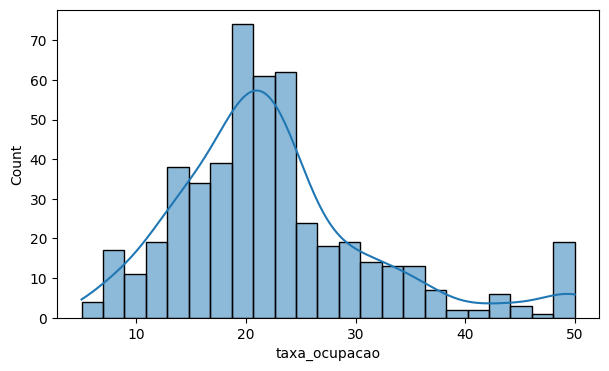

In [9]:
# Histograma da variavel-alvo
plt.figure(figsize=(7,4))
sns.histplot(df.taxa_ocupacao, kde=True)
plt.show()

Nota-se que a distribuição da variável alvo (taxa_ocupacao) é levemente assimétrica a direita (calda mais longa a direita do pico). Diante disso, iremos aplicar uma transformação logaritmica para evitar distorção nos dados e tentar tornar a distribuição mais simétrica.

In [10]:
# Transformando a variavel
df['taxa_ocupacao_log'] = np.log(df['taxa_ocupacao'])

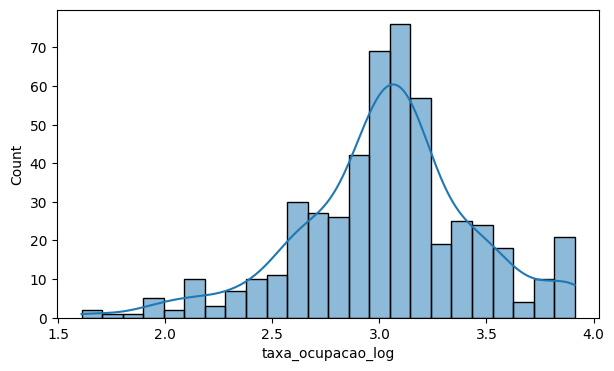

In [11]:
# Verificando o grafico da nova variavel
plt.figure(figsize=(7,4))
sns.histplot(df.taxa_ocupacao_log, kde=True)
plt.show()

Perceba que, após a aplicação do logarítmo na variável-alvo, foi alterada a distribuição da variável, tornando-a um pouco mais simétrica. Podemos mensurar isso calculando o coeficiente de assimetria (skew).

In [12]:
# Coeficiente de assimetria
print("Assimetria da variável taxa_ocupacao: ", round(df['taxa_ocupacao'].skew(),4))
print("Assimetria da variável taxa_ocupacao_log: ", round(df['taxa_ocupacao_log'].skew(),4))

Assimetria da variável taxa_ocupacao:  1.0996
Assimetria da variável taxa_ocupacao_log:  -0.3329


**Interpretação**

O coeficiente de assimetria é uma métrica que indica a tendência da distribuição dos dados em uma variável númerica. O coeficiente zero indica simetria, enquanto um coeficiente positivo, que foi o caso da variável 'taxa_ocupacao', indica que a distribuição é assimétrica à direita; já um valor negativo indica assimetria à esquerda (caso da variável 'taxa_ocupacao_log'). Perceba que, após a transformação logarítmica da variável taxa_ocupacao, embora ainda tenha ficado assimétrica, a intensidade da assimetria é menor do que da variável não transformada.

In [13]:
# Visualizando os dados
df.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
0,6.575,65.2,0.00634,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7,3.546740
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4,3.508556
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2,3.589059


In [14]:
# Separando as variáveis
alvo = colunas[-1]
atributos = colunas[:-2]
print("variavel alvo: ",alvo)
print("variaveis preditoras: ",atributos)

variavel alvo:  taxa_ocupacao
variaveis preditoras:  ['numero_medio_quartos_por_residencia', 'idade_media_residencias', 'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas', 'rio_no_bairro', 'taxa_poluicao', 'distancia_centro', 'index_acessibilidade', 'imposto_residencial', 'taxa_professores', 'consumo_medio_energia']


In [15]:
# Função para o plot da relação da variável alvo com alguns atributos
def get_pairs(data, alvo, atributos, n):

    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

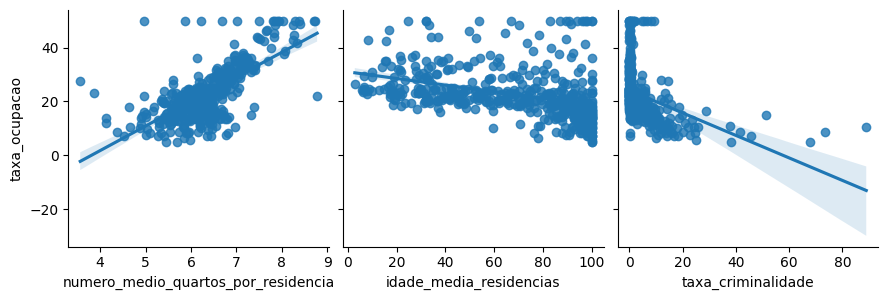

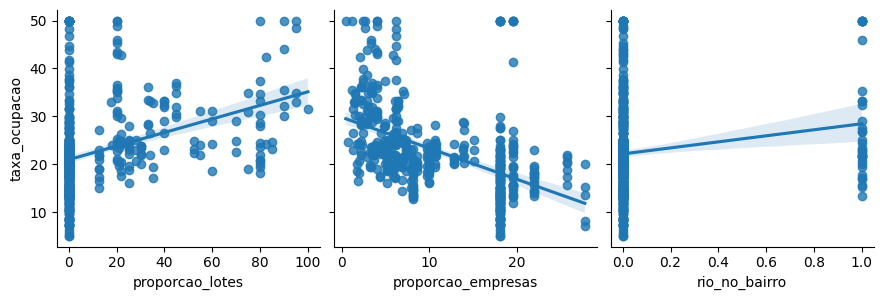

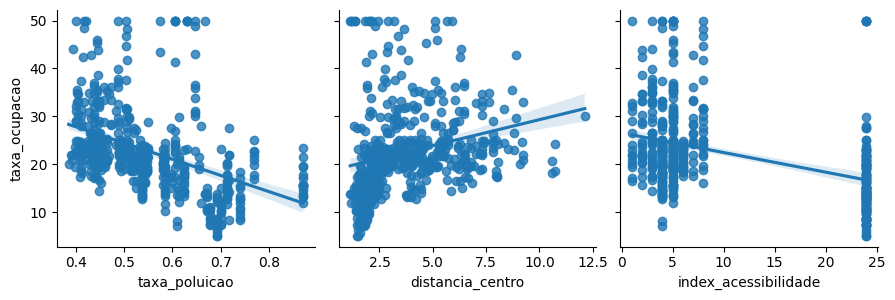

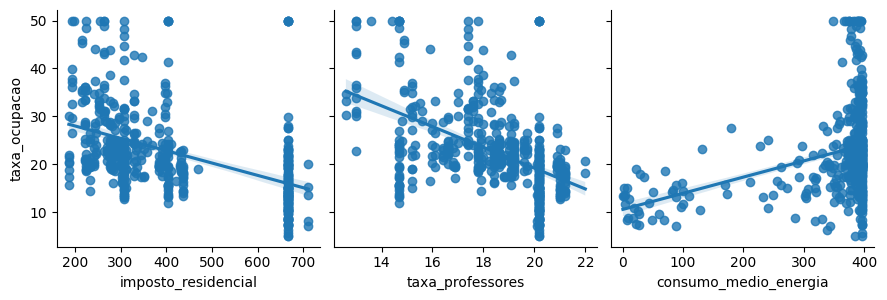

In [16]:
# Visualizando graficamente outliers
get_pairs(df,alvo, atributos,3)

É importante ressaltar, a partir da análise gráfica, que a relação entre algumas variáveis preditoras e a variável alvo está sendo influenciada por outliers que estão distorcendo os gráficos e influenciando a interpretação da relação entre as variáveis. Em razão disso, na próxima seção trataremos os valores extremos (outliers).

## Tratando Outliers

Trataremos os outliers utilizando a técnica estatística de intervalo interquartil (IQR) que leva em consideração os quartis 1, 2 e 3 para criação de um intervalo padrão onde os dados precisam estar concentrados. Os dados que estiverem fora desse intervalo, ou seja abaixo do limite inferior ou acima do limite superior, são considerados outliers.

In [17]:
# Criando o IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
linf = Q1 - 3.5 * IQR
lsup = Q3 + 3.5 * IQR
print(IQR)

numero_medio_quartos_por_residencia      0.737500
idade_media_residencias                 49.875000
taxa_criminalidade                       3.611473
proporcao_lotes                         12.500000
proporcao_empresas                      12.970000
rio_no_bairro                            0.000000
taxa_poluicao                            0.175250
distancia_centro                         3.126725
index_acessibilidade                    20.000000
imposto_residencial                    385.000000
taxa_professores                         2.975000
consumo_medio_energia                   21.072500
taxa_desabrigados                       10.102500
taxa_ocupacao                            7.925000
taxa_ocupacao_log                        0.381264
dtype: float64


**Nota:** A fórmula original dos limites superior e inferior tem como constante o valor 1,5 que multiplica o intervalo interquartil. Todavia, foi escolhido o valor de 3,5 para que se preservasse uma quantidade maior dos dados, uma vez que quanto maior essa constante menos rigoroso é o corte nos dados.

In [18]:
# Define os outliers com base no IQR
outliers = ( (df < (linf)) | (df > (lsup)) ).sum()
outliers.sort_values(ascending=False)

consumo_medio_energia                  54
proporcao_lotes                        39
rio_no_bairro                          35
taxa_criminalidade                     24
idade_media_residencias                 0
proporcao_empresas                      0
numero_medio_quartos_por_residencia     0
taxa_poluicao                           0
distancia_centro                        0
imposto_residencial                     0
index_acessibilidade                    0
taxa_professores                        0
taxa_desabrigados                       0
taxa_ocupacao                           0
taxa_ocupacao_log                       0
dtype: int64

In [19]:
# Cria um resumo com os outliers
outliers_summary = pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(df)) * 100})
outliers_summary[outliers_summary.Outliers > 0]

,Outliers,Percentual
taxa_criminalidade,24,4.8
proporcao_lotes,39,7.8
rio_no_bairro,35,7.0
consumo_medio_energia,54,10.8


In [21]:
# Remoção dos Outliers
filtro = ~( (df < (linf)) | (df > (lsup)) ).any(axis=1)
novo_df = df[filtro]

In [22]:
# Shape do Novo Dataframe
novo_df.shape

(359, 15)

In [23]:
# Registros removidos
print("Total de registros originais: ",df.shape[0])
print("Total de registros restantes: ",novo_df.shape[0])
print("Total de Registros removidos: ",(df.shape[0] - novo_df.shape[0]))
print("% Linhas Removidas: ", round(((df.shape[0] - novo_df.shape[0]) / df.shape[0]) * 100, 2))

Total de registros originais:  500
Total de registros restantes:  359
Total de Registros removidos:  141
% Linhas Removidas:  28.2


In [25]:
# Visualizando o novo df
novo_df.sample(5)

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
280,7.820,64.5,0.03578,20.0,3.33,0,0.4429,4.6947,5,216,14.9,387.31,3.76,45.4,3.815512
302,6.495,18.4,0.09266,34.0,6.09,0,0.4330,5.4917,7,329,16.1,383.61,8.67,26.4,3.273364
260,7.203,81.8,0.54011,20.0,3.97,0,0.6470,2.1121,5,264,13.0,392.80,9.59,33.8,3.520461
335,6.037,34.5,0.03961,0.0,5.19,0,0.5150,5.9853,5,224,20.2,396.90,8.01,21.1,3.049273
402,6.404,100.0,9.59571,0.0,18.10,0,0.6930,1.6390,24,666,20.2,376.11,20.31,12.1,2.493205


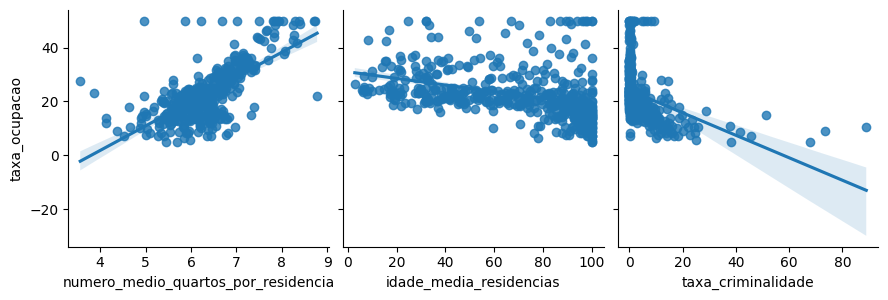

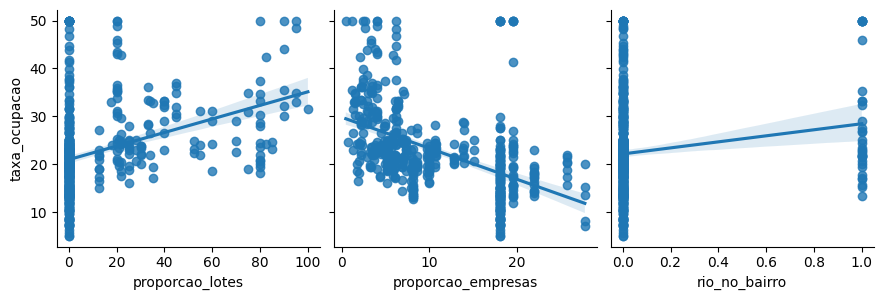

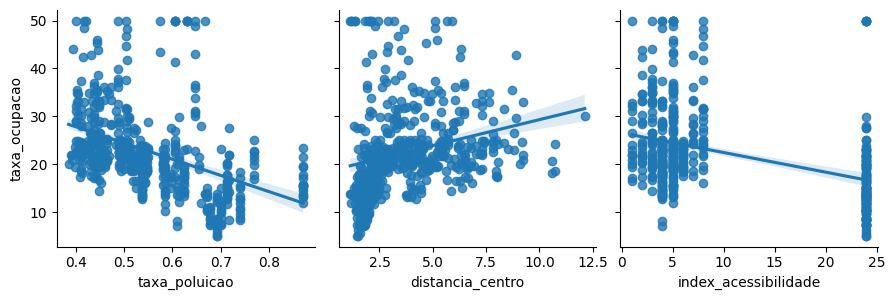

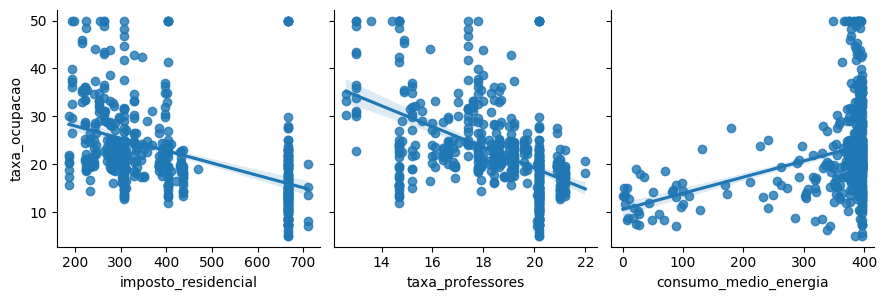

In [26]:
# Visualizando graficamente outliers
get_pairs(df,alvo, atributos,3)

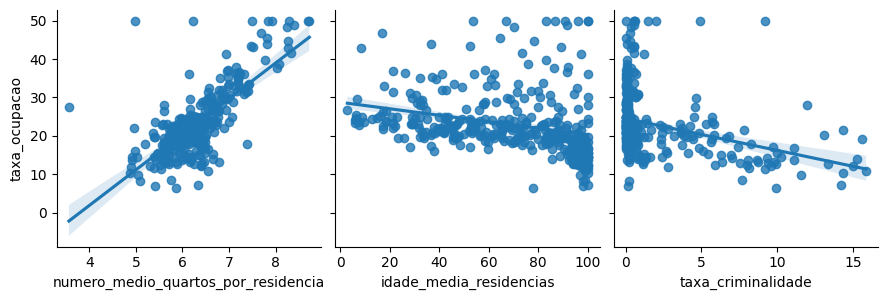

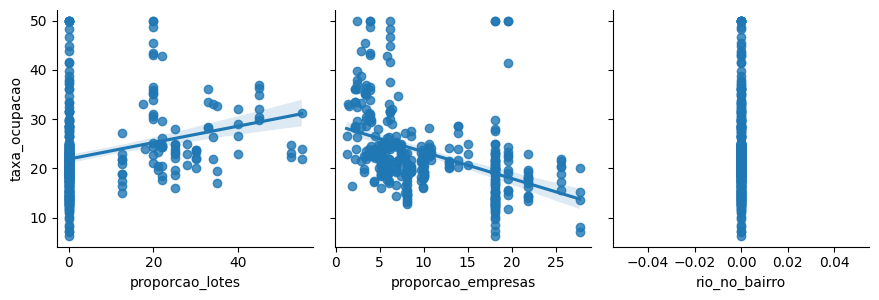

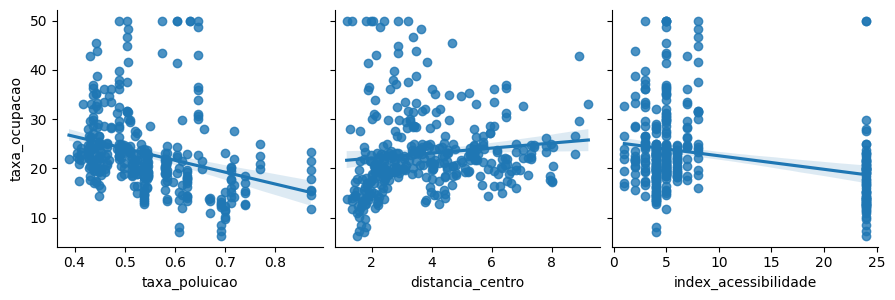

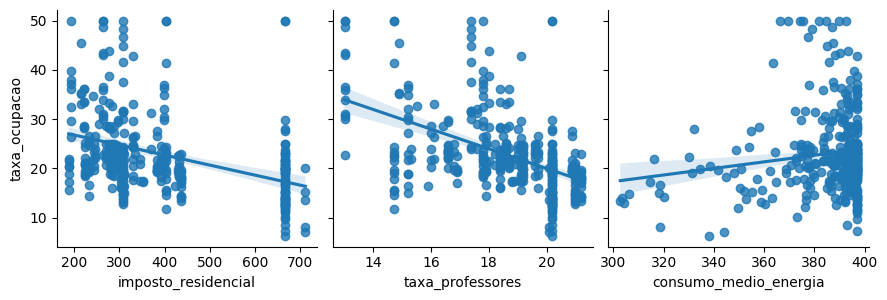

In [27]:
# Visualizando graficamente outliers
get_pairs(novo_df,alvo, atributos,3)

Perceba agora, a partir da análise gráfica, que com a remoção dos outliers, a relação entre as variáveis ficou mais nítida e coerente. Em certos casos, poucos outliers são capazes de alterar a percepção da relação entre as variáveis e, com isso, impactar decisões.

## Análise de Multicolinearidade

In [28]:
df_cor = novo_df.corr() # Cria a matriz de correlação
df_cor

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
numero_medio_quartos_por_residencia,1.000000,-0.147460,-0.190812,0.268494,-0.384644,NaN,-0.247066,0.126059,-0.151181,-0.263037,-0.358725,0.172472,-0.603495,0.739763,0.689432
idade_media_residencias,-0.147460,1.000000,0.415927,-0.408864,0.526979,NaN,0.685365,-0.679891,0.353157,0.432524,0.183316,-0.226565,0.556358,-0.281748,-0.376389
taxa_criminalidade,-0.190812,0.415927,1.000000,-0.253836,0.522945,NaN,0.594032,-0.455675,0.862399,0.779662,0.330687,-0.250648,0.466292,-0.336686,-0.437751
proporcao_lotes,0.268494,-0.408864,-0.253836,1.000000,-0.440733,NaN,-0.412632,0.532537,-0.219539,-0.275772,-0.403735,0.145490,-0.337313,0.265792,0.296787
proporcao_empresas,-0.384644,0.526979,0.522945,-0.440733,1.000000,NaN,0.687138,-0.612747,0.516461,0.691672,0.377195,-0.299480,0.577627,-0.441253,-0.501927
rio_no_bairro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taxa_poluicao,-0.247066,0.685365,0.594032,-0.412632,0.687138,NaN,1.000000,-0.750633,0.570238,0.638127,0.118415,-0.290076,0.540344,-0.302336,-0.390402
distancia_centro,0.126059,-0.679891,-0.455675,0.532537,-0.612747,NaN,-0.750633,1.000000,-0.400885,-0.487710,-0.135615,0.217864,-0.419948,0.115482,0.208938
index_acessibilidade,-0.151181,0.353157,0.862399,-0.219539,0.516461,NaN,0.570238,-0.400885,1.000000,0.874382,0.385752,-0.263440,0.353546,-0.259680,-0.329556
imposto_residencial,-0.263037,0.432524,0.779662,-0.275772,0.691672,NaN,0.638127,-0.487710,0.874382,1.000000,0.416390,-0.310362,0.460126,-0.390071,-0.469598


A multicolinearidade ocorre quando duas ou mais variáveis preditoras apresentam alta correlação, podendo gerar problemas nos coeficientes e impactar nas previsões. A matriz de correlação possibilitar ver a correlação entre as variáves no dataframe e identificar possíveis casos de multicolinearidade.

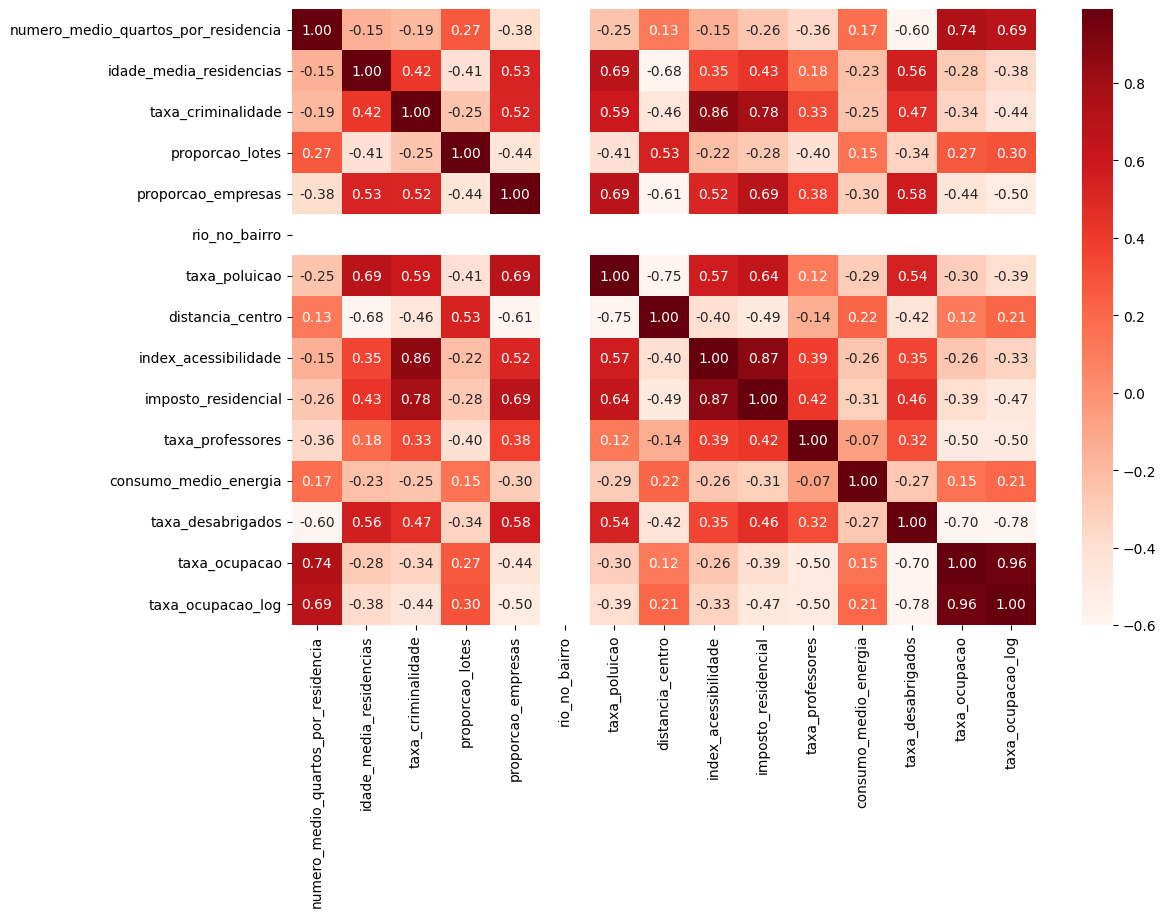

In [29]:
# Visualizando a matriz de correlação com heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_cor, annot=True,fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)
plt.show()

In [30]:
# Iremos remover a variável 'rio_no_bairro', uma vez que é uma variável categórica e ficou com valores zerados, após remover os outliers
novo_df = novo_df.drop(columns={'rio_no_bairro'})

Por enquanto, não iremos adotar estratégias para contornar a multicolinearidade. Seguiremos com todas as variáveis e, após gerar e avaliar a primeira versão do modelo, adotaremos estratégias para remover a multicolinearidade.

## Preparação dos Dados

In [31]:
# Variavel alvo e Variaveis Preditoras
Y = novo_df['taxa_ocupacao_log']
X = novo_df.drop(columns={'taxa_ocupacao','taxa_ocupacao_log'})

In [32]:
# Divisao dos dados
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=1)

In [33]:
# Dimensao dos dados de treino e teste
print("Dimensao dos dados de treino: ",X_treino.shape)
print("Dimensao dos dados de teste: ",X_teste.shape)

Dimensao dos dados de treino:  (287, 12)
Dimensao dos dados de teste:  (72, 12)


## Modelo - Versão 1

In [34]:
X_treino_const = sm.add_constant(X_treino)
print("Dimensão do treino: ",X_treino_const.shape)
print(type(X_treino_const))

Dimensão do treino:  (287, 13)
<class 'pandas.core.frame.DataFrame'>


In [35]:
# Versão 1 do modelo
modelo_v1 = sm.OLS(Y_treino, X_treino_const).fit()

In [36]:
# Resumo estatístico do modelo
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     72.21
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.61e-77
Time:                        10:48:49   Log-Likelihood:                 109.72
No. Observations:                 287   AIC:                            -193.4
Df Residuals:                     274   BIC:                            -145.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   3.6953      0.325     11.361      0.000       3.055       4.336
numero_medio_quartos_por_residencia     0.1406      0.021      6.736      0.000       0.099       0.182
idade_media_residencias                -0.0007      0.001     -1.184      0.238      -0.002       0.000
taxa_criminalidade                     -0.0377      0.007     -5.568      0.000      -0.051      -0.024
proporcao_lotes                         0.0002      0.001      0.207      0.836      -0.002       0.002
proporcao_empresas                      0.0032      0.003      1.209      0.228      -0.002       0.008
taxa_poluicao                          -0.3084      0.199     -1.548      0.123      -0.701       0.084
distancia_centro                       -0.0448      0.010     -4.624      0.000      -0.064      -0.026
index_acessibilidade                    0.0228      0.004      6.328      0.000       0.016       0.030
imposto_residencial                    -0.0007      0.000     -4.637      0.000      -0.001      -0.000
taxa_professores                       -0.0375      0.007     -5.665      0.000      -0.051      -0.024
consumo_medio_energia               -1.819e-05      0.001     -0.033      0.974      -0.001       0.001
taxa_desabrigados                      -0.0243      0.003     -9.437      0.000      -0.029      -0.019
==============================================================================
Omnibus:                       84.973   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.692
Skew:                           1.138   Prob(JB):                     3.24e-86
Kurtosis:                       8.267   Cond. No.                     1.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Coeficientes aprendidos pelo modelo
modelo_v1.params

const                                  3.695287
numero_medio_quartos_por_residencia    0.140582
idade_media_residencias               -0.000673
taxa_criminalidade                    -0.037731
proporcao_lotes                        0.000216
proporcao_empresas                     0.003229
taxa_poluicao                         -0.308351
distancia_centro                      -0.044761
index_acessibilidade                   0.022815
imposto_residencial                   -0.000737
taxa_professores                      -0.037544
consumo_medio_energia                 -0.000018
taxa_desabrigados                     -0.024284
dtype: float64

O modelo apresenta um ótimo coeficiente de ajuste (R-squared) de 0.76, todavia, a nota 2 indica multicolinearidade e, por isso, fere um dos pressupostos da regressão linear de que os variáveis preditoras precisam ser independentes entre si.

### Verificando a multicolinearidade com a técnica Fator de Inflação da Variância (VIF)

In [38]:
# Função para checar o VIF de todas as variáveis
def verifica_vif(train):

    # Cria o dataframe
    vif = pd.DataFrame()

    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]

    return vif

In [39]:
# Estamos verificando o VIF sem a constante requerida pelo Statsmodels
print(verifica_vif(X_treino))

                                feature         VIF
0   numero_medio_quartos_por_residencia  127.553977
1               idade_media_residencias   16.822772
2                    taxa_criminalidade    6.009826
3                       proporcao_lotes    2.193716
4                    proporcao_empresas   10.906635
5                         taxa_poluicao   93.198845
6                      distancia_centro   16.502544
7                  index_acessibilidade   16.346428
8                   imposto_residencial   42.550715
9                      taxa_professores  123.360868
10                consumo_medio_energia  269.679542
11                    taxa_desabrigados   11.355632


Interpreta-se o VIF da seguinte maneira: Quanto maior o VIF das variáveis maiores são as correlações. É possível perceber que as variáveis apresentaram elevado índice do indicador. Portanto, iremos ajustar a escala dos dados e mensurar novamente.

### Padronizando os dados

In [ ]:
# Criar o padronizador
padronizador = StandardScaler()

In [41]:
# Aplicar o padronizador
X_treino_escalado = padronizador.fit_transform(X_treino)
X_teste_escalado = padronizador.transform(X_teste)

In [ ]:
# Verificar o shape dos dados e o tipo
print(X_treino_escalado.shape)
print(X_teste_escalado.shape)
print(type(X_treino_escalado))
print(type(X_teste_escalado))

(287, 12)
(72, 12)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Seguiremos para a próxima seção, criando a segunda versão do modelo, agora com os dados estando na mesma escala (padronização).

## Modelo - Versão 2

In [43]:
# Adicionando a constante
X_treino_const = sm.add_constant(X_treino_escalado)

In [44]:
# Modelo v2
modelo_v2 = sm.OLS(Y_treino, X_treino_const).fit()

In [45]:
# Resumo estatístico
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     72.21
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.61e-77
Time:                        10:55:49   Log-Likelihood:                 109.72
No. Observations:                 287   AIC:                            -193.4
Df Residuals:                     274   BIC:                            -145.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0792      0.010    308.729      0.000       3.060       3.099
x1             0.0908      0.013      6.736      0.000       0.064       0.117
x2            -0.0188      0.016     -1.184      0.238      -0.050       0.012
x3            -0.1210      0.022     -5.568      0.000      -0.164      -0.078
x4             0.0027      0.013      0.207      0.836      -0.023       0.029
x5             0.0214      0.018      1.209      0.228      -0.013       0.056
x6            -0.0315      0.020     -1.548      0.123      -0.071       0.009
x7            -0.0832      0.018     -4.624      0.000      -0.119      -0.048
x8             0.1761      0.028      6.328      0.000       0.121       0.231
x9            -0.1169      0.025     -4.637      0.000      -0.166      -0.067
x10           -0.0744      0.013     -5.665      0.000      -0.100      -0.049
x11           -0.0004      0.011     -0.033      0.974      -0.022       0.021
x12           -0.1539      0.016     -9.437      0.000      -0.186      -0.122
==============================================================================
Omnibus:                       84.973   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.692
Skew:                           1.138   Prob(JB):                     3.24e-86
Kurtosis:                       8.267   Cond. No.                         8.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Perceba que o coeficiente de ajuste do modelo não foi impactado, continuou com 0.76, já a nota 2, que antes apontava a existência de multicolinearidade, desapareceu. Portanto, isso indica que o problema de multicolinearidade foi solucionado. Verificaremos novamente o VIF.

In [46]:
# Cria um dataframe com os dados de X_treino_escalado (após mudar a escala foi alterado para o tipo ndarray)
df_X_treino = pd.DataFrame(X_treino_escalado, columns=X_treino.columns)

In [47]:
# Resumo
print(verifica_vif(df_X_treino))

                                feature       VIF
0   numero_medio_quartos_por_residencia  1.826959
1               idade_media_residencias  2.533082
2                    taxa_criminalidade  4.749147
3                       proporcao_lotes  1.738147
4                    proporcao_empresas  3.154459
5                         taxa_poluicao  4.154415
6                      distancia_centro  3.254731
7                  index_acessibilidade  7.782178
8                   imposto_residencial  6.383572
9                      taxa_professores  1.733490
10                consumo_medio_energia  1.204773
11                    taxa_desabrigados  2.674069


Perceba que os valores de VIF reduziram significativamente. Portanto, definiremos um treshold para selecionar as variáveis para serem usadas na próxima versão do modelo. Iremos remover as variáveis que apresentaram um VIF superior a 5.

In [48]:
# Criando um dataframe dos dados de teste
df_X_teste = pd.DataFrame(X_teste_escalado, columns=X_teste.columns)
print(X_teste.columns)

Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas',
       'taxa_poluicao', 'distancia_centro', 'index_acessibilidade',
       'imposto_residencial', 'taxa_professores', 'consumo_medio_energia',
       'taxa_desabrigados'],
      dtype='object')


In [49]:
# Removendo as variáveis
del df_X_treino['index_acessibilidade']
del df_X_treino['imposto_residencial']
del df_X_teste['index_acessibilidade']
del df_X_teste['imposto_residencial']

In [63]:
# Verificando o shape
print(df_X_treino.shape)
print(df_X_teste.shape)
print(df_X_treino.columns)

(287, 10)
(72, 10)
Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas',
       'taxa_poluicao', 'distancia_centro', 'taxa_professores',
       'consumo_medio_energia', 'taxa_desabrigados'],
      dtype='object')


In [51]:
# Convertendo novamente para o tipo ndarray
X_treino_escalado = df_X_treino.values
X_teste_escalado = df_X_teste.values
print(type(X_treino_escalado))
print(type(X_teste_escalado))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Modelo - Versão 3

In [52]:
# Adicionando a constante
X_treino_const = sm.add_constant(X_treino_escalado)

In [53]:
# modelo v3
modelo_v3 = sm.OLS(Y_treino, X_treino_const).fit()

In [54]:
# Resumo estatístico
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     72.34
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           3.44e-71
Time:                        11:00:43   Log-Likelihood:                 89.712
No. Observations:                 287   AIC:                            -157.4
Df Residuals:                     276   BIC:                            -117.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0792      0.011    288.989      0.000       3.058       3.100
x1             0.0947      0.014      6.581      0.000       0.066       0.123
x2            -0.0235      0.017     -1.390      0.166      -0.057       0.010
x3            -0.0464      0.015     -3.025      0.003      -0.077      -0.016
x4             0.0032      0.014      0.230      0.819      -0.024       0.030
x5            -0.0091      0.017     -0.542      0.588      -0.042       0.024
x6            -0.0110      0.021     -0.521      0.603      -0.052       0.030
x7            -0.0731      0.019     -3.816      0.000      -0.111      -0.035
x8            -0.0588      0.013     -4.430      0.000      -0.085      -0.033
x9            -0.0031      0.012     -0.264      0.792      -0.026       0.020
x10           -0.1708      0.017    -10.019      0.000      -0.204      -0.137
==============================================================================
Omnibus:                       65.602   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.114
Skew:                           0.792   Prob(JB):                     3.46e-77
Kurtosis:                       8.190   Cond. No.                         5.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Colunas
print("Total de variáveis: ",len(X_treino.columns))
print("Colunas")
for i,c in enumerate(df_X_treino.columns.to_list()):
    print(i,"-",c)

Total de variáveis:  12
Colunas
0 - numero_medio_quartos_por_residencia
1 - idade_media_residencias
2 - taxa_criminalidade
3 - proporcao_lotes
4 - proporcao_empresas
5 - taxa_poluicao
6 - distancia_centro
7 - taxa_professores
8 - consumo_medio_energia
9 - taxa_desabrigados


Perceba no resumo estatístico do modelo as colunas coef (coeficientes), std error (erro padrão), t (Eststística-t) e P>|t| (valor-p). Focaremos nos resultados do valor-p para realizar outra seleção de variáveis. O valor-p é uma métrica usada em testes de hipóteses para avaliar a força da evidência contra a hipótese nula. A hipótese nula nesse caso é de que não há relação entre as variáveis preditoras e a variável-alvo e a hipótese alternativa é de que há relação entre as variáveis preditoras e a variável-alvo. A interpretação do teste é a seguinte: se o valor-p for menor do que o nível de significância (a probabilidade de cometer o Erro Tipo I que seria a probabilidade de rejeitar a hipótese nula quando essa é verdadeira) geralmente 0.05, então rejeitamos a hipótese nula. Caso contrário, isto é, quando o valor-p é maior do que o nível de significância de 0.05, falhamos em rejeitar a hipótese nula.

A partir disso, iremos remover as variáveis x2 (idade_media_residencias), x4 (proporcao_lotes), x5 (proporcao_empresas), x6 (taxa_poluicao), e x9 (consumo_medio_energia), uma vez que o valor-p do teste t foi acima de 0.05, indicando que as variáveis não são estatisticamente significativas para o modelo.

In [68]:
# Removendo as variáveis selecionadas do dataset
X_treino_clean = np.delete(X_treino_escalado, [1,3,4,5,8], axis=1)
X_teste_clean = np.delete(X_teste_escalado, [1,3,4,5,8], axis=1)

In [69]:
# Verificando novamente o shape dos dados
print(X_treino_clean.shape)
print(X_teste_clean.shape)

(287, 5)
(72, 5)


## Modelo - Versão 4

In [70]:
# Adiciona a constante
X_treino_const = sm.add_constant(X_treino_clean)

In [71]:
# Cria o modelo
modelo_v4 = sm.OLS(Y_treino, X_treino_const).fit()

In [72]:
# Resumo estatístico
modelo_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     144.8
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.38e-75
Time:                        11:48:54   Log-Likelihood:                 87.921
No. Observations:                 287   AIC:                            -163.8
Df Residuals:                     281   BIC:                            -141.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0792      0.011    289.782      0.000       3.058       3.100
x1             0.0925      0.014      6.770      0.000       0.066       0.119
x2            -0.0511      0.014     -3.756      0.000      -0.078      -0.024
x3            -0.0498      0.013     -3.986      0.000      -0.074      -0.025
x4            -0.0603      0.012     -5.116      0.000      -0.084      -0.037
x5            -0.1840      0.015    -12.125      0.000      -0.214      -0.154
==============================================================================
Omnibus:                       65.927   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.616
Skew:                           0.822   Prob(JB):                     4.39e-72
Kurtosis:                       7.977   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Importante enfatizar que após a remoção das variáveis, o valor do R-quadrado reduziu de 0.724 para 0.72. Isso indica que as variáveis não eram significativas para o modelo. Observe ainda que o R2 ajustado aumentou de 0.714 para 0.715.

In [ ]:
# Verificando os coeficientes
coef = modelo_v4.params.reset_index()
coef.columns = ['Variavel', 'Coeficiente']
coef.iloc[:,0] = [
'constante',
'numero_medio_quartos_por_residencia',
'taxa_criminalidade',
'distancia_centro',
'taxa_professores',
'taxa_desabrigados'
]
coef

,Variavel,Coeficiente
0,constante,3.079185
1,numero_medio_quartos_por_residencia,0.092507
2,taxa_criminalidade,-0.051106
3,distancia centro,-0.049823
4,taxa professores,-0.060312
5,taxa desabrigados,-0.183989


A seguir se tem a interpretação dos coeficientes das variáveis preditoras que permaneceram no modelo.

*   numero_medio_quartos_por_residencia: Um aumento de uma unidade da variável aumenta em 9.2507% a taxa de ocupação
*   taxa_criminalidade: Um aumento de uma unidade da variável reduz em 5.1106% a taxa de ocupação
*   distancia_centro: Um aumento de uma unidade da variável reduz em 4.9823% a taxa de ocupação
*   taxa_professores: Um aumento de uma unidade da variável reduz em 6.0312% a taxa de ocupação
*   taxa_desabrigados: Um aumento de uma unidade da variável reduz em 18.3989% a taxa de ocupação

Vale ressaltar que, como a relação do modelo é **log-nível**, a interpretação é de que um aumento de n unidades na variável Xi ocasiona um aumento (ou diminuição) de βi% na variável Y.

Para uso do modelo, faz-se necessário validar as suposições da regressão linear. Esse trabalho não será realizado nesse projeto, ficando como sugestão de melhoria.